# Viajes compartidos - Chicago.
Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Se deberá analizar los datos de los competidores y probar la hipótesis sobre el impacto del clima en la frecuencia de los viajes.

# Contents <a id='back'></a>

* [Introducción](#intro)
* [Inicialización](#inicializacion)
* [Cargando datos](#cargando_datos)
* [Explorando datos iniciales](#explorando_datos_iniciales)
* [Corrigiendo los datos](#corrigiendo_los_datos)
* [Estudiar parámetros principales](#estudiar_parámetros_principales)
* [Probando las hipótesis estadísticas](#probando_las_hipótesis_estadísticas)
* [Conclusión general](#end)

## Introducción <a id='intro'></a>
**Propósito del proyecto**

Encontrar patrones y comprender las preferencias de los pasajeros y a su vez el impacto de los factores externos (climáticos) en los viajes.




### Objetivos:
1. Identificar los principales barrios  destino y las principales compañias de viaje.
2. Determinar los viajes de los principales barrios  destino y las principales compañias de viaje.
3. Demostrar si la duración promedio de los viajes desde el barrio **Loop** hasta el **Aeropuerto Internacional O'Hare** los cambia según el clima.

[Volver a Contenidos](#back)

## Inicialización <a id='inicializacion'></a>

In [1]:
# Cargando todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy import stats
from scipy import stats as st

[Volver a Contenidos](#back)

## Cargando los datos <a id='cargando_datos'></a>

In [2]:
# Cargando los archivos de datos en diferentes DataFrames
tc_data = pd.read_csv('/datasets/project_sql_result_01.csv')
nh_data = pd.read_csv('/datasets/project_sql_result_04.csv')
ph_data = pd.read_csv('/datasets/project_sql_result_07.csv')

[Volver a Contenidos](#back)

## Explorando los datos <a id='explorando_datos_iniciales'></a>

**Descripción de datos**

### Viajes por compañía

**Tabla tc**
- `company_name` —  nombre de la empresa de taxis
- `trips_amount` —  el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

In [3]:
tc_data.shape

(64, 2)

In [4]:
# Imprimiendo la información general/resumen sobre el DataFrame de los planes
tc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
tc_data.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
# Imprime una muestra de los datos para los planes
tc_data.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


**Valores ausentes**

In [7]:
tc_data.isna().sum().sort_values(ascending=False)

company_name    0
trips_amount    0
dtype: int64

### Viajes por barrio

**Tabla nh**
- `dropoff_location_name` —  barrios de Chicago donde finalizaron los viajes
- `average_trips` —  el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

In [8]:
nh_data.shape

(94, 2)

In [9]:
# Imprimiendo la información general/resumen sobre el DataFrame de los planes
nh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
nh_data.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [11]:
# Imprime una muestra de los datos para los planes
nh_data.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


**Valores ausentes**

In [12]:
nh_data.isna().sum().sort_values(ascending=False)

dropoff_location_name    0
average_trips            0
dtype: int64

### Viajes desde el Loop hasta el Aeropuerto Internacional O'Hare

**Tabla ph**
- `start_ts` —  fecha y hora de recogida,
- `weather_conditions` —  condiciones climáticas en el momento en el que comenzó el viaje,
- `duration_seconds` —  duración del viaje en segundos.

In [13]:
ph_data.shape

(1068, 3)

In [14]:
# Imprimiendo la información general/resumen sobre el DataFrame de los planes
ph_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [15]:
ph_data.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [16]:
# Imprime una muestra de los datos para los planes
ph_data.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


**Valores ausentes**

In [17]:
ph_data.isna().sum().sort_values(ascending=False)

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

### Conclusión intermedia

 - **`DataFrame Viajes por compañia`** — la tabla tiene dos columnas, 74 filas. Sin valores ausentes.

 - **`DataFrame Viajes por barrio`** — la tabla tiene dos columnas, 94 filas. Sin valores ausentes.
 
 - **`DataFrame Viajes desde el Loop hasta el Aeropuerto Internacional O'Hare`** — la tabla tiene tres columnas, 1.068 filas. Sin valores ausentes.

[Volver a Contenidos](#back)

## Corrigiendo los datos <a id='corrigiendo_los_datos'></a>

**Valores únicos**

In [18]:
sorted(tc_data["company_name"].unique())

['0118 - 42111 Godfrey S. Awir',
 '1085 - 72312 N and W Cab Co',
 '1469 - 64126 Omar Jada',
 '2092 - 61288 Sbeih Company',
 '2192 - 73487 Zeymane Corp',
 '2241 - 44667 - Felman Corp',
 '24 Seven Taxi',
 '2733 - 74600 Benny Jona',
 '2809 - 95474 C & D Cab Co Inc.',
 '2823 - 73307 Lee Express Inc',
 '3011 - 66308 JBL Cab Inc.',
 '303 Taxi',
 '3556 - 36214 RC Andrews Cab',
 '3591 - 63480 Chuks Cab',
 '3620 - 52292 David K. Cab Corp.',
 '3623 - 72222 Arrington Enterprises',
 '3721 - Santamaria Express',
 '4053 - 40193 Adwar H. Nikola',
 '4615 - 83503 Tyrone Henderson',
 '4623 - 27290 Jay Kim',
 '5 Star Taxi',
 '5006 - 39261 Salifu Bawa',
 '5062 - 34841 Sam Mestas',
 '5074 - 54002 Ahzmi Inc',
 '5874 - 73628 Sergey Cab Corp.',
 '5997 - 65283 AW Services Inc.',
 '6057 - 24657 Richard Addo',
 '6574 - Babylon Express Inc.',
 '6742 - 83735 Tasha Ride Inc',
 '6743 - 78771 Luhak Corp',
 'American United',
 'American United Taxi Affiliation',
 'Blue Diamond',
 'Blue Ribbon Taxi Association Inc.',
 

In [19]:
sorted(nh_data["dropoff_location_name"].unique())

['Albany Park',
 'Andersonville',
 'Archer Heights',
 'Armour Square',
 'Ashburn',
 'Auburn Gresham',
 'Austin',
 'Avalon Park',
 'Avondale',
 'Belmont Cragin',
 'Beverly',
 'Boystown',
 'Bridgeport',
 'Brighton Park',
 'Bucktown',
 'Burnside',
 'Calumet Heights',
 'Chatham',
 'Chicago Lawn',
 'Chinatown',
 'Clearing',
 'Douglas',
 'Dunning',
 'East Side',
 'East Village',
 'Edgewater',
 'Edison Park',
 'Englewood',
 'Fuller Park',
 'Gage Park',
 'Garfield Park',
 'Garfield Ridge',
 'Gold Coast',
 'Grand Boulevard',
 'Grand Crossing',
 'Grant Park',
 'Hegewisch',
 'Hermosa',
 'Humboldt Park',
 'Hyde Park',
 'Irving Park',
 'Jackson Park',
 'Jefferson Park',
 'Kenwood',
 'Lake View',
 'Lincoln Park',
 'Lincoln Square',
 'Little Italy, UIC',
 'Little Village',
 'Logan Square',
 'Loop',
 'Lower West Side',
 'Mckinley Park',
 'Montclare',
 'Morgan Park',
 'Mount Greenwood',
 'Museum Campus',
 'Near South Side',
 'New City',
 'North Center',
 'North Lawndale',
 'North Park',
 'Norwood Park'

### Conclusión intermedia

 - **`DataFrame Viajes por compañia`** y **`DataFrame Viajes por barrio`**, no contiene valores repetidos.
 
 [Volver a Contenidos](#back)

## Estudiar parámetros principales <a id='estudiar_parámetros_principales'></a> 

### **10 principales barrios en términos de finalización del recorrido**

In [20]:
ten_nh = nh_data.sort_values(by="average_trips", ascending=False).head(10)
ten_nh

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### **10 principales compañias de taxis**

In [21]:
ten_tc = tc_data.sort_values(by="trips_amount", ascending=False).head(10)
ten_tc

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### **Empresas de taxis en los principales barrios**

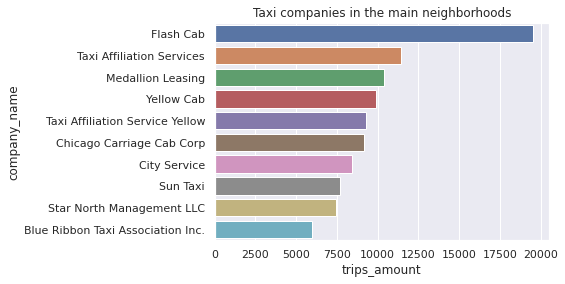

In [22]:
sns.set_theme()
c = sns.barplot(x="trips_amount", y="company_name", data=ten_tc)
c.set_xlabel("trips_amount")
plt.title(f"Taxi companies in the main neighborhoods")
plt.show()

#### Conclusión intermedia

- La compañia **Flash Cab**, tiene la mayor cantidad de viajes hechos y 8.000 viajes aprox. por encima de la compañia **Taxis Affiliation Services**.
- **Taxi Affiliation Services** y **Medallion Leasing**, son las segunda y tercera empresa con mayor cantidad de viajes; con 11.422 y 10.367 viajes respectivamente.
- Del **Top 10**, la empresa con menos cantidad de viajes es **Blue Ribbon Taxi Association Inc** con 6.000 viajes aprox.

### **Números de viajes en los principales barrios**

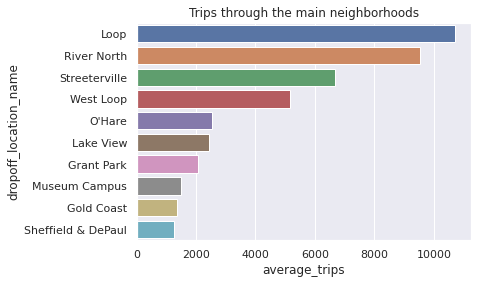

In [23]:
d = sns.barplot(x="average_trips", y="dropoff_location_name", data=ten_nh)
d.set_xlabel("average_trips")
plt.title(f"Trips through the main neighborhoods")
plt.show()

#### Conclusión intermedia

- Del **Top 10** de viajes destino, los barrios **Loop, River North, Streeterville y West Loop** son los que tienen más viajes.
- **Loop y River North**, son los dos barrios con valores más altos, con 10.700 y 9.500 aprox. respectivamente.
- El tercer y cuarto barrio, sería **Streeterville y West Loop**, con 6.600 y 5.100 viajes aprox. respectivamente.
- Del barrio **O´Hare** a **Sheffield & DePaul** son los barrios dentro del Top 10, con menos viajes, con valores entre 2.500 a 1.200 aprox.

[Volver a Contenidos](#back)

## Probando las hipótesis estadísticas <a id='probando_las_hipótesis_estadísticas'></a>

### Definición de hipótesis nula e hipótesis alternativa

- **`H0`**= la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos *no cambia*.

- **`H1`**= la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos *cambia*.

### Prueba de hipótesis

In [24]:
good_conditions = ph_data.loc[ph_data["weather_conditions"] == "Good"]["duration_seconds"]
bad_conditions = ph_data.loc[ph_data["weather_conditions"] == "Bad"]["duration_seconds"]

In [25]:
# Prueba las hipótesis

alpha= 0.05


# Verificando si los datos tienen una dist. normal

_, var_p_value = stats.levene(good_conditions, bad_conditions)

if var_p_value > alpha:
    print("Las varianzas de ambos grupos son iguales.")
    print()
else:
    print("Las varianzas de ambos grupos no son iguales.")
    print()
    

#Prueba de hipótesis

t_statistic, p_value  = stats.ttest_ind(
    good_conditions,
    bad_conditions
)

#equal_var=False   Se activa si los datos no tienen dist. normal.

print('t_statistic: ', t_statistic)
print()
print('p_value: ', p_value)
print()
print(p_value, "<", alpha)

if p_value < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

Las varianzas de ambos grupos son iguales.

t_statistic:  -6.946177714041499

p_value:  6.517970327099473e-12

6.517970327099473e-12 < 0.05
Rechazamos la hipótesis nula


La probabilidad de que statistic ocurra es de 6.517970327099473e-10 % y la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos *cambia*.

[Volver a Contenidos](#back)

## Conclusión general <a id='end'></a>

Para la realización de este proyecto, se inició escribiendo un código para analizar los datos meteorológicos de un sitio web. Luego, se realizó un análisis exploratorio de datos, donde:
- Se encontró el número de viajes en taxi para cada empresa del 15 al 16 de noviembre de 2017, la cantidad de viajes para cada empresa cuyo nombre contenía las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017, y se halló el número de viajes de las empresas Flash Cab y Taxi Affiliation Services, empresas populares en noviembre 2017.

Luego, para comprobar si la hipótesis de que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos:
- Se recuperaron los registros de condiciones meteorológicas de los barrios de O'Hare y Loop; también, se obtuvieron las condiciones climáticas para cada viaje del día sábado y duración de cada viaje.

Se evidencio que la compañía Flash Cab tiene la mayor cantidad de viajes hechos, muy por encima de su competencia. Los barrios **Loop, River North, Streeterville y West Loop** son los que tienen más viajes destino, estando en un **Top 4**, comparados con el resto.

Y por último, al probar la **hipótesis estadística** tenemos: se rechaza la *hipótesis nula*; por lo cuál, la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos *cambian*.

[Volver a Contenidos](#back)